## References

Models converted from Shawwn's training [1] and Gwern's release [2]. 2D character picture (HatsuneMiku) is licensed under CC BY-NC by piapro [3].

- [1] Shawwn, The model is trained based on his fork of google's 'compare_gan', https://github.com/shawwn/compare_gan/
- [2] Gwern, "A prototype anime BigGAN 256px trained on Danbooru2019+e621 for 600k iterations is now available for download", https://www.gwern.net/Faces#danbooru2019e621-256px-biggan
- [3] "For Creators", http://piapro.net/en_for_creators.html

记得给我点星星啦！ [我的仓库](https://www.github.com/HighCWu/anime_biggan_toy)

If you like my repo, star it. [My repo](https://www.github.com/HighCWu/anime_biggan_toy)

这个Notebook仅作展示用，我的仓库里有更多相关内容。

This notebook is for display purposes only, there are more related content in my repo.

In [ ]:
# 解压预训练模型 Unzip Pretrained Model
!unzip data/data49029/anime-biggan.zip -d data/

In [1]:
# 加载模型 Load Model
from networks import model_cache, load_G, load_D
from networks import std_gen, std_gen_interpolate
from networks import std_enc, std_enc_with_D
load_G('data/anime-biggan-256px-run39-607250.generator')

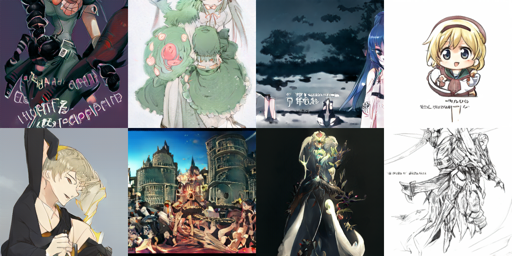

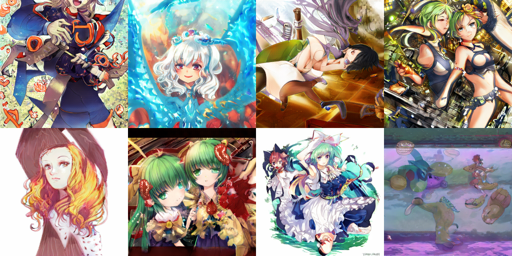

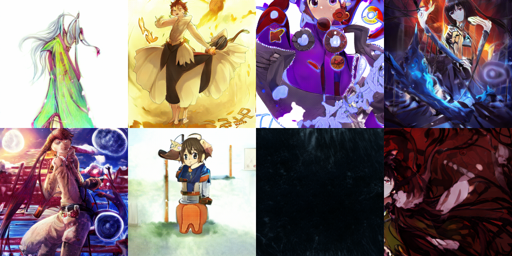

In [2]:
# 运行模型的标准生成输出过程 Run Output Process of Model's Standard Generation 
import numpy as np
from PIL import Image
from IPython.display import display

def concat_imgs_bsz8(imgs):
    np_imgs = [np.asarray(img) for img in imgs]
    img1 = np.concatenate(np_imgs[:4], 1)
    img2 = np.concatenate(np_imgs[4:], 1)
    img = Image.fromarray(np.concatenate([img1, img2], 0))
    return img.resize([img.size[0]//2, img.size[1]//2])

imgs = std_gen(8, seed=233)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = std_gen(8, seed=None)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i+8).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = std_gen(8, seed=234) # 不同的seed不同的结果 Different seed with different result
for i, img in enumerate(imgs):
    img.save(f'data/std_seed234_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

In [3]:
# 运行模型的标准生成动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML
std_gen_interpolate(8, seed=233, out_path='data/std_out1.gif')
std_gen_interpolate(8, seed=None, out_path='data/std_out2.gif')
std_gen_interpolate(8, seed=234, out_path='data/std_out3.gif') # 不同的seed不同的结果 Different seed with different result
display(HTML('<img src="data/std_out1.gif">'))
display(HTML('<img src="data/std_out2.gif">'))
display(HTML('<img src="data/std_out3.gif">'))

2/320
320/320
320/320
320/320


In [4]:
# 运行模型的标准生成分层插值动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML
std_gen_interpolate(8, seed=2333, out_path='data/std_inter1.gif', levels="z11;z12")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter2.gif', levels="z21;z22")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter3.gif', levels="z31;z32") # 不同的seed不同的结果 Different seed with different result
std_gen_interpolate(8, seed=2333, out_path='data/std_inter4.gif', levels="z41;z42")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter5.gif', levels="z51;z52")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter6.gif', levels="z61;z62")
display(HTML('<img src="data/std_inter1.gif">'))
display(HTML('<img src="data/std_inter2.gif">'))
display(HTML('<img src="data/std_inter3.gif">'))
display(HTML('<img src="data/std_inter4.gif">'))
display(HTML('<img src="data/std_inter5.gif">'))
display(HTML('<img src="data/std_inter6.gif">'))

2/320
320/320
320/320
320/320
320/320
320/320
320/320


## 尝试编码已存在的图像 Try to encode image
BigGAN没有StyleGAN那么丰富的输入，所以这种尝试的结果是失败。
BigGAN does not have as rich input as StyleGAN, so this attempt failed.

loss: 0.08729273825883865  2/2000
loss: 0.04128742963075638  2000/20000


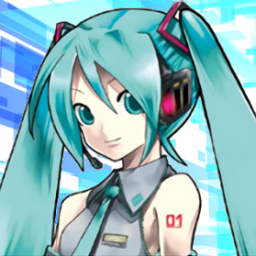

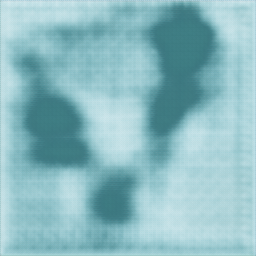

In [5]:
from IPython.display import display

dec, img = std_enc(path='miku.png', steps=2000, lr=4e-3)
display(img)
display(dec)

In [6]:
load_D('data/anime-biggan-256px-run39-607250.discriminator')

loss: 204.1401824951172  2/2000
loss: 88.60155487060547  2000/2000


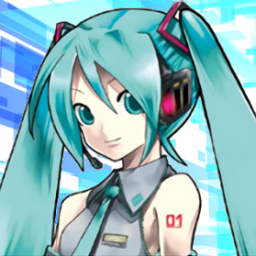

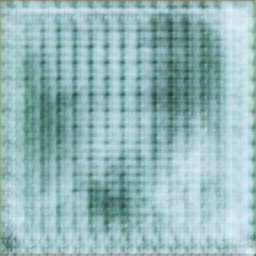

In [7]:
from IPython.display import display

dec, img = std_enc_with_D(path='miku.png', steps=2000, lr=1e-3, levels=[1,2], weights=[100,1])
display(img)
display(dec)